In [1]:
import numpy as np
from connectivipy import mvar_gen
import connectivipy as cp
import pandas as pd
import csv
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df01 = pd.read_csv('S070-R01-all.csv', skiprows= [1,2], index_col= [0])
df01 = df01[df01.columns[:-1]]

df02 = pd.read_csv('S070-R02-all.csv', skiprows= [1,2], index_col= [0])
df02 = df02[df02.columns[:-1]]

In [3]:
df = pd.concat([df01,df02], ignore_index=True).T
del df01
del df02

In [25]:
A = np.zeros((1, 64, 64))
for i in range(64):
    for j in range(64):
        A[0][i][j] = A3.values[i][j]

# now we build a corresponding MVAR process without instantenous effect
L = np.linalg.inv(np.eye(64) - A)
acf = np.zeros((1, 64, 64))
for i in range(1):
    acf[i] = np.dot(L, A[0])

# generate 5-channel signals from matrix above
signal_inst = cp.mvar_gen_inst(A, int(10e4))

signal = cp.mvar_gen(acf, 64)

# fit MVAR parameters
bv, vfb = cp.Mvar.fit(signal_inst, 1, 'yw')

av, vfa = cp.Mvar.fit(signal, 1, 'yw')


# use connectivity estimators
ipdc = cp.conn.iPDC()
ipdcval = ipdc.calculate(bv, vfb, 1.)

pdc = cp.conn.PDC()
pdcval = pdc.calculate(av, vfa, 1.)

In [ ]:
# short time version with default parameters
pdc_shorttime = data3.short_time_conn('pdc', nfft=100, no=10)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


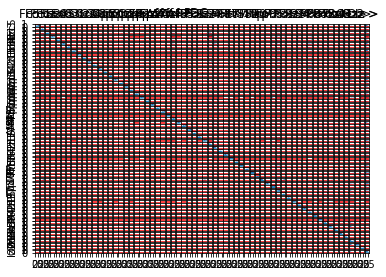

In [19]:
data3.plot_conn("PDC") 

In [26]:
mat_max = np.zeros((64,64))
n = 0
idx = ''
for i in range(100):
    aux = pdcval[i]
    m = aux>mat_max
    m = list(m)
    r = sum([list(el).count(True) for el in m])
    if r > n:
        idx = i
        n = r
        mat_max = pdcval[i]
i

99

In [27]:
con_values = [mat_max[i][j] for i in range(64) for j in range(64)]

con_values = sorted(con_values)

threshold = con_values[int(len(con_values)*0.8):][0]
print(threshold)
adj_mat = [ [0 for i in range(64)] for j in range(64)]
for i in range(64):
    for j in range(64):
        if mat_max[i][j]>threshold:
            adj_mat[i][j]=1

0.128260761911079


In [29]:
G = nx.DiGraph(np.array(adj_mat))

mapping = {old:channels[old] for old in G }

G = nx.relabel_nodes(G, mapping)

In [169]:
G = nx.relabel_nodes(G, mapping)

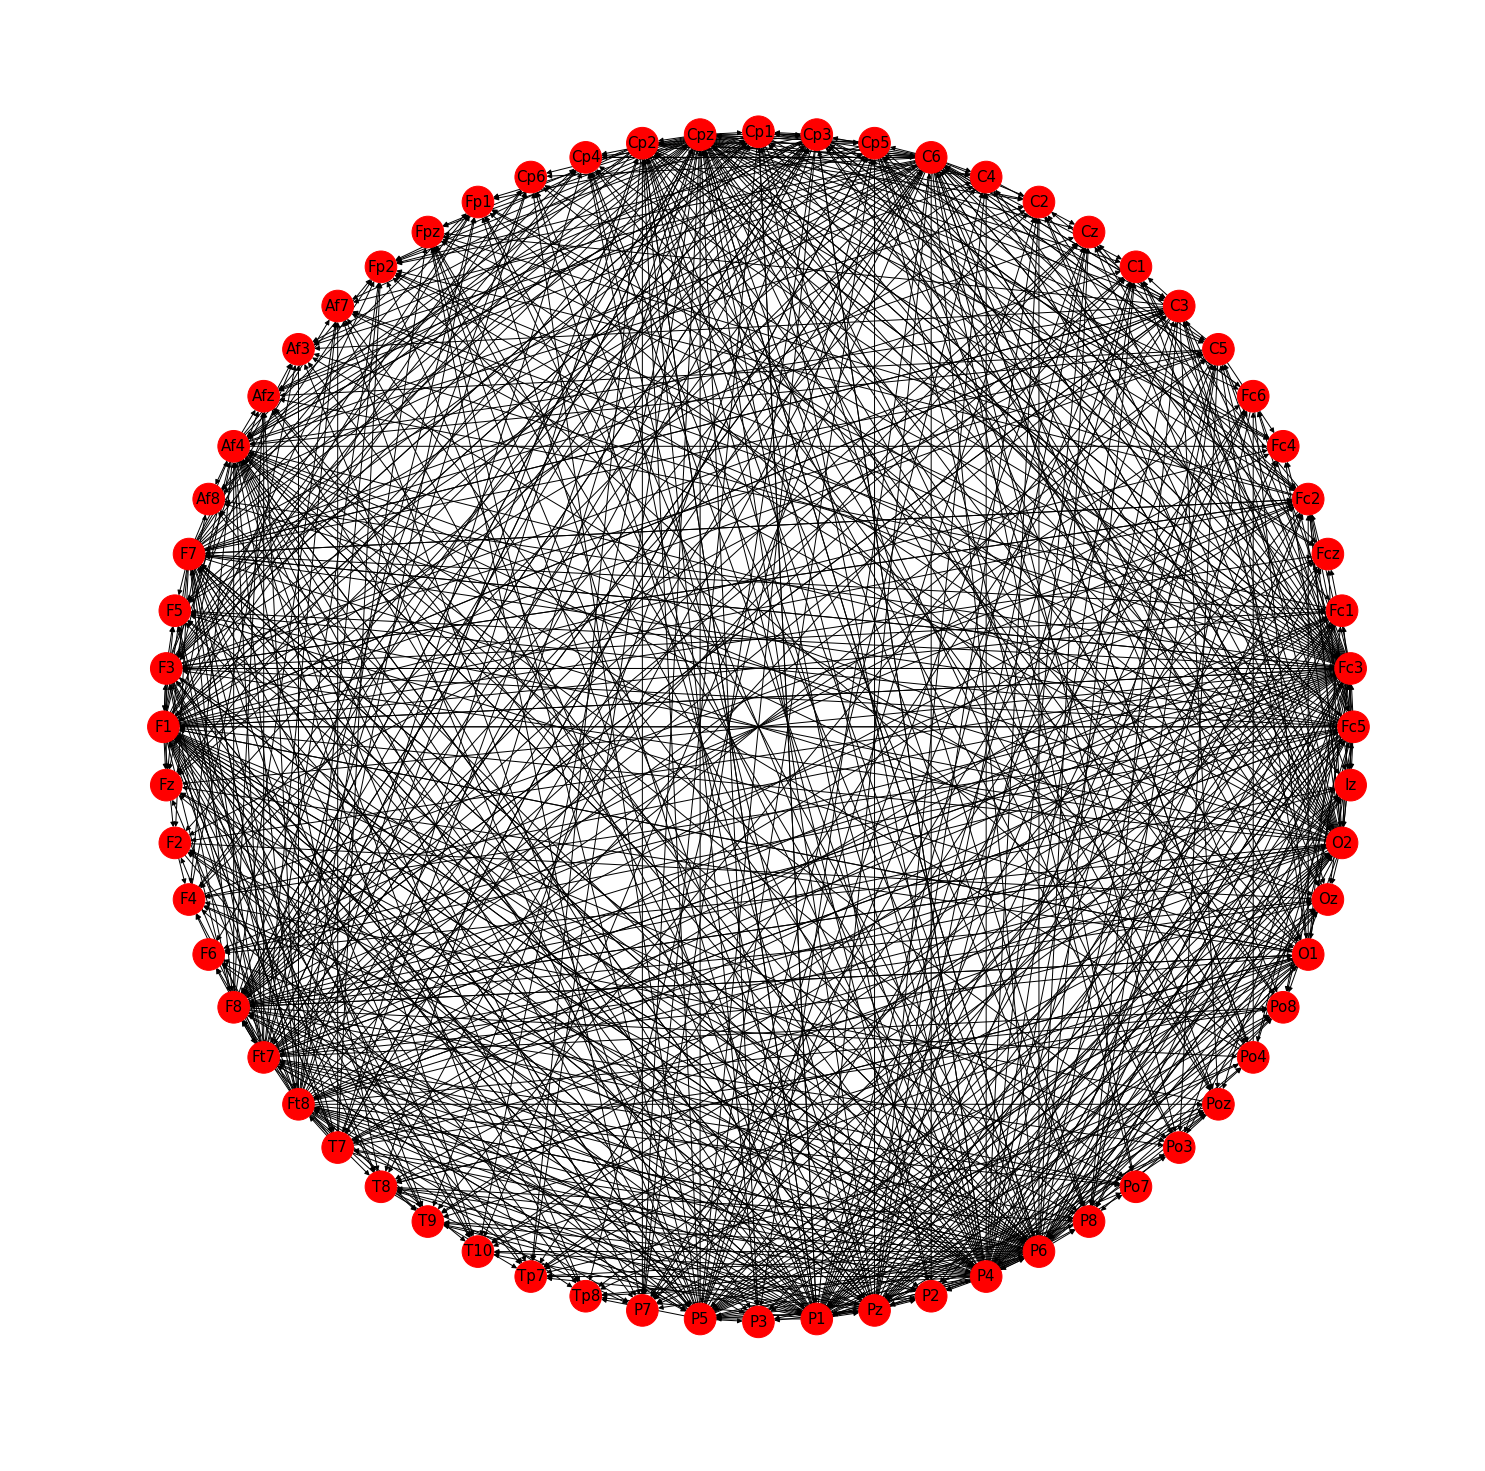

In [170]:
pos = nx.circular_layout(G)
nx.draw(G, with_labels = True, pos=pos, font_size=15, node_size=[1000]*64)

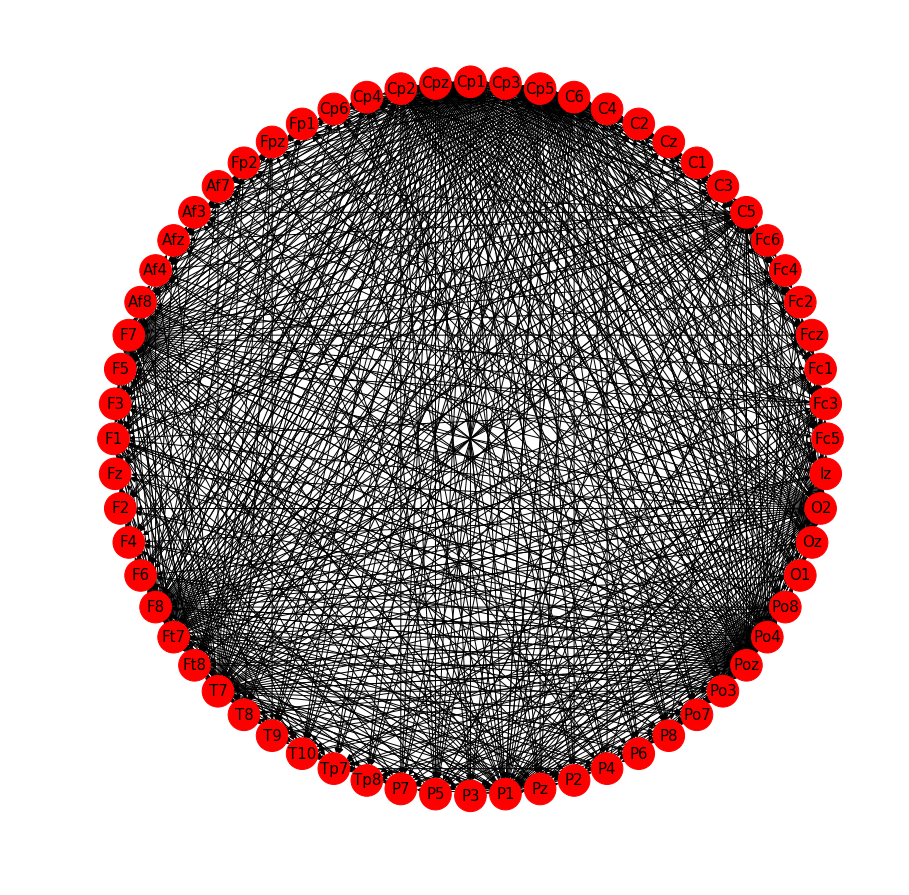

In [33]:
pos = nx.circular_layout(G)
plt.figure(figsize=(12,12))
nx.draw(G, with_labels = True, pos=pos, font_size=15, node_size=[1000]*64)

In [ ]:
pos = nx.circular_layout(G)
plt.figure(figsize=(12,12))
nx.draw(G, with_labels = True, pos=pos, font_size=15, node_size=[1000]*64)

In [178]:
G.in_edges('Fc5')

InEdgeDataView([('C5', 'Fc5'), ('Cpz', 'Fc5'), ('Af4', 'Fc5'), ('F1', 'Fc5'), ('F8', 'Fc5'), ('Ft8', 'Fc5'), ('P1', 'Fc5'), ('P4', 'Fc5'), ('Po4', 'Fc5'), ('O2', 'Fc5')])

In [179]:
G.out_edges('Fc5')

OutEdgeDataView([('Fc5', 'Fc3'), ('Fc5', 'Fc1'), ('Fc5', 'Fc2'), ('Fc5', 'Fc4'), ('Fc5', 'Fc6'), ('Fc5', 'C1'), ('Fc5', 'Cpz'), ('Fc5', 'Cp2'), ('Fc5', 'Fp1'), ('Fc5', 'Fp2'), ('Fc5', 'Af7'), ('Fc5', 'F7'), ('Fc5', 'F5'), ('Fc5', 'F3'), ('Fc5', 'F1'), ('Fc5', 'F4'), ('Fc5', 'F6'), ('Fc5', 'Ft8'), ('Fc5', 'T10'), ('Fc5', 'Tp7'), ('Fc5', 'Tp8'), ('Fc5', 'P5'), ('Fc5', 'P1'), ('Fc5', 'Pz'), ('Fc5', 'P6'), ('Fc5', 'P8'), ('Fc5', 'Po8'), ('Fc5', 'Oz'), ('Fc5', 'O2'), ('Fc5', 'Iz')])

In [43]:
def plot_double_conn(values_a, values_b, name='', fs=1, ylim=None, xlim=None, show=True):
    "function to plot two sets of connectivity values"
    fq, k, k = values_a.shape
    fig, axes = plt.subplots(k, k)
    freqs = np.linspace(0, fs*0.5, fq)
    if not xlim:
        xlim = [0, np.max(freqs)]
    if not ylim:
        ylim = [0, 1]
    for i in range(k):
        for j in range(k):
            axes[i, j].fill_between(freqs, values_b[:, i, j], 0, facecolor='red', alpha=0.5)
            axes[i, j].fill_between(freqs, values_a[:, i, j], 0, facecolor='black', alpha=0.5)
            axes[i, j].set_xlim(xlim)
            axes[i, j].set_ylim(ylim)
    plt.suptitle(name,y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    if show:
        plt.show()

C:\Users\Alessandra\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


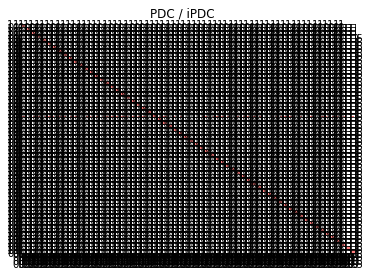

In [42]:
plot_double_conn(pdcval**2, ipdcval**2, 'PDC / iPDC')

A synthesis of the results (proved in an extended Appendix) is followed by a series of Monte Carlo simulations of representative examples. Results: DTF estimators are asymptotically normal when the true values are different from zero. Under the null hypothesis H 0 : DTF=0, the estimator is distributed as a linear combination of independent X 1 2 variables. Conclusions: Null DTF rejection is shown to be achievable with identical performance irrespective of which DTF form is adopted.

Our data from the two datasets are taken and saved in A matrix. A: matrix of samples with shape (2,64,64) (not 9599 in the second dimention because the next method mvar_gen wanted a matrix with (p,k,k).
ysig : multitrial signal generation from matrix A.
64-channel signal with 614336 data points
and 3 trials using function mvar_gen. it tooks

In [4]:
A3 = df.copy()

In [26]:
av, vf = cp.Mvar.fit(A3.values, method='yw')

In [5]:
fs = 10

In [6]:
channels = ['Fc5','Fc3','Fc1','Fcz','Fc2','Fc4','Fc6','C5','C3','C1','Cz','C2','C4','C6','Cp5','Cp3','Cp1','Cpz','Cp2','Cp4','Cp6','Fp1','Fpz','Fp2','Af7','Af3','Afz','Af4','Af8','F7','F5','F3','F1','Fz','F2','F4','F6','F8','Ft7','Ft8','T7','T8','T9','T10','Tp7','Tp8','P7','P5','P3','P1','Pz','P2','P4','P6','P8','Po7','Po3','Poz','Po4','Po8','O1','Oz','O2','Iz']

In [7]:
data3 = cp.Data(A3.values, 64, channels)

In [8]:
data3.fit_mvar(2, 'yw')

In [30]:
ar, vr = data3.mvar_coefficients

In [9]:
gdtf_values = data3.conn('gdtf')

In [11]:
gdtf_significance = data3.significance(Nrep=10, alpha=0.05)

. . . . . . . . . . |


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
gdtf_values.shape

(100, 64, 64)

In [12]:
gdtf_significance

array([[0.99724611, 0.0178891 , 0.02428022, ..., 0.02974321, 0.02196446,
        0.02075839],
       [0.01671597, 0.99720114, 0.02620207, ..., 0.02121907, 0.02197003,
        0.02463767],
       [0.02218527, 0.01508253, 0.9972318 , ..., 0.01957854, 0.01781051,
        0.02153767],
       ...,
       [0.02913015, 0.02059556, 0.026388  , ..., 0.99713869, 0.02187937,
        0.0157745 ],
       [0.02064833, 0.02160002, 0.0294417 , ..., 0.01888999, 0.99711925,
        0.02849166],
       [0.0293018 , 0.02991019, 0.02240756, ..., 0.0219703 , 0.02706409,
        0.99675581]])

In [20]:
gdtf_significance.shape

(64, 64)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


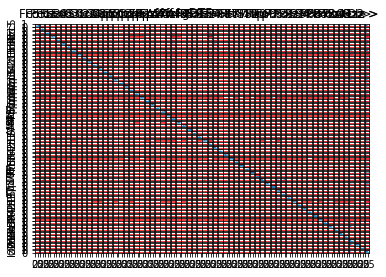

In [14]:
 data3.plot_conn('gDTF')

In [14]:
plt.rcParams["figure.figsize"] = (20,20)

In [ ]:
#data3.plot_conn('gDTF')

In [13]:
gdtf_significance[3][6] == gdtf_significance[6][3]

False

In [ ]:
# deleting columns from  a copy of 64 channels dataframe

TypeError: plot_conn() got an unexpected keyword argument 'format'

In [23]:
df_19 = df.T.copy()

In [24]:
df_19.columns = channels

In [25]:
reduced_channels= ['Fp1','Fp2','F7','F3','Fz','F4','F8','T7','C3','Cz','C4','T8','P7','P3','Pz','P4','P8','O1','O2']

In [26]:
df_19 = df_19[reduced_channels]

In [27]:
df_19 = df_19.T

In [28]:
data19 = cp.Data(df_19.values, 64, reduced_channels)

In [29]:
con_values = [gdtf_significance[i][j] for i in range(64) for j in range(64)]

con_values = sorted(con_values)

threshold = con_values[int(len(con_values)*0.8):][0]

adj_mat = [ [0 for i in range(64)] for j in range(64)]
for i in range(64):
    for j in range(64):
        if gdtf_significance[i][j]>threshold:
            adj_mat[i][j]=1


In [ ]:
G_1

In [31]:
G_1 = nx.DiGraph(np.array(adj_mat))

In [32]:
mapping = {old:channels[old] for old in G_1 }

In [33]:
G_1 = nx.relabel_nodes(G_1, mapping)

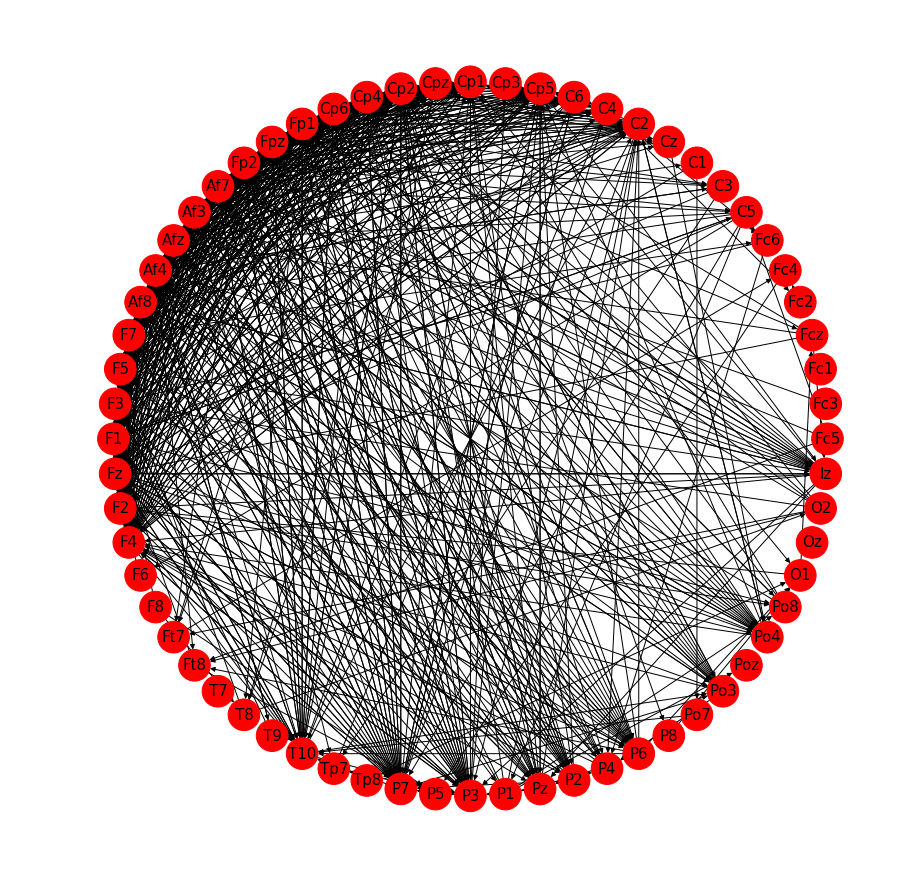

In [37]:
pos = nx.circular_layout(G_1)
plt.figure(figsize=(12,12)) 
nx.draw(G_1, with_labels = True, pos=pos, font_size=15, node_size=[1000]*64)

In [156]:
nx.density(G_1)

0.203125

In [129]:
gdtf_significance_50 = data3.significance(resolution= 50, Nrep=10, alpha=0.05)

. . . . . . . . . . |


/Users/ismail/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [ ]:
gdtf_significance == gdtf_significance_50


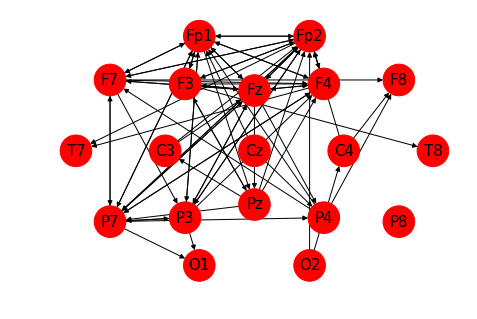

In [38]:
pos = {}
with open("channel_locations.txt") as f:
    next(f)
    c = csv.reader(f)
    for line in c:
        line = line[0]
        line=line.split('        ')
        pos[line[1]] = (float(line[2]), float(line[3]))

# Topographical representation
sub = G_1.subgraph(reduced_channels)

nx.draw(sub, with_labels = True, pos=pos, font_size=15, node_size=[1000]*64)

# task 2.1

In [132]:
G_1

In [133]:
G_1.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63))

In [136]:
G_1.is_directed()

True

In [140]:
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

In [141]:
check_symmetric(gdtf_significance)

False

In [181]:
nx.average_clustering(G_1.to_undirected())

0.5231147936962627

In [184]:
# since the G_i is not a connected graph we will calculate the average path length for each connected component:
sh_i = 0
n_i = 0
for g in nx.connected_component_subgraphs(G_1.to_undirected()):
    sh_i += nx.average_shortest_path_length(g) * nx.number_of_nodes(g)
    n_i += nx.number_of_nodes(g)
sh_i/n_i

1.8359375

In [189]:
tmpList = []
for n in G_1.nodes():
    tmpList.append([n, G_1.degree(n),G_1.in_degree(n),G_1.out_degree(n)])
nodes_df = pd.DataFrame(tmpList, columns=['Node','Degree', 'In', 'Out'])



In [194]:
nodes_top10 = nodes_df.sort_values(by='Degree', ascending=False).head(10)

In [195]:
nodes_top10

Node  Degree  In  Out
24  Af7      71  37   34
26  Afz      68  36   32
21  Fp1      64  34   30
33   Fz      63  34   29
23  Fp2      63  33   30
27  Af4      62  31   31
22  Fpz      61  33   28
20  Cp6      60  28   32
28  Af8      58  29   29
18  Cp2      56  29   27

In [34]:
# creation of small world graph
smn = nx.navigable_small_world_graph(64)

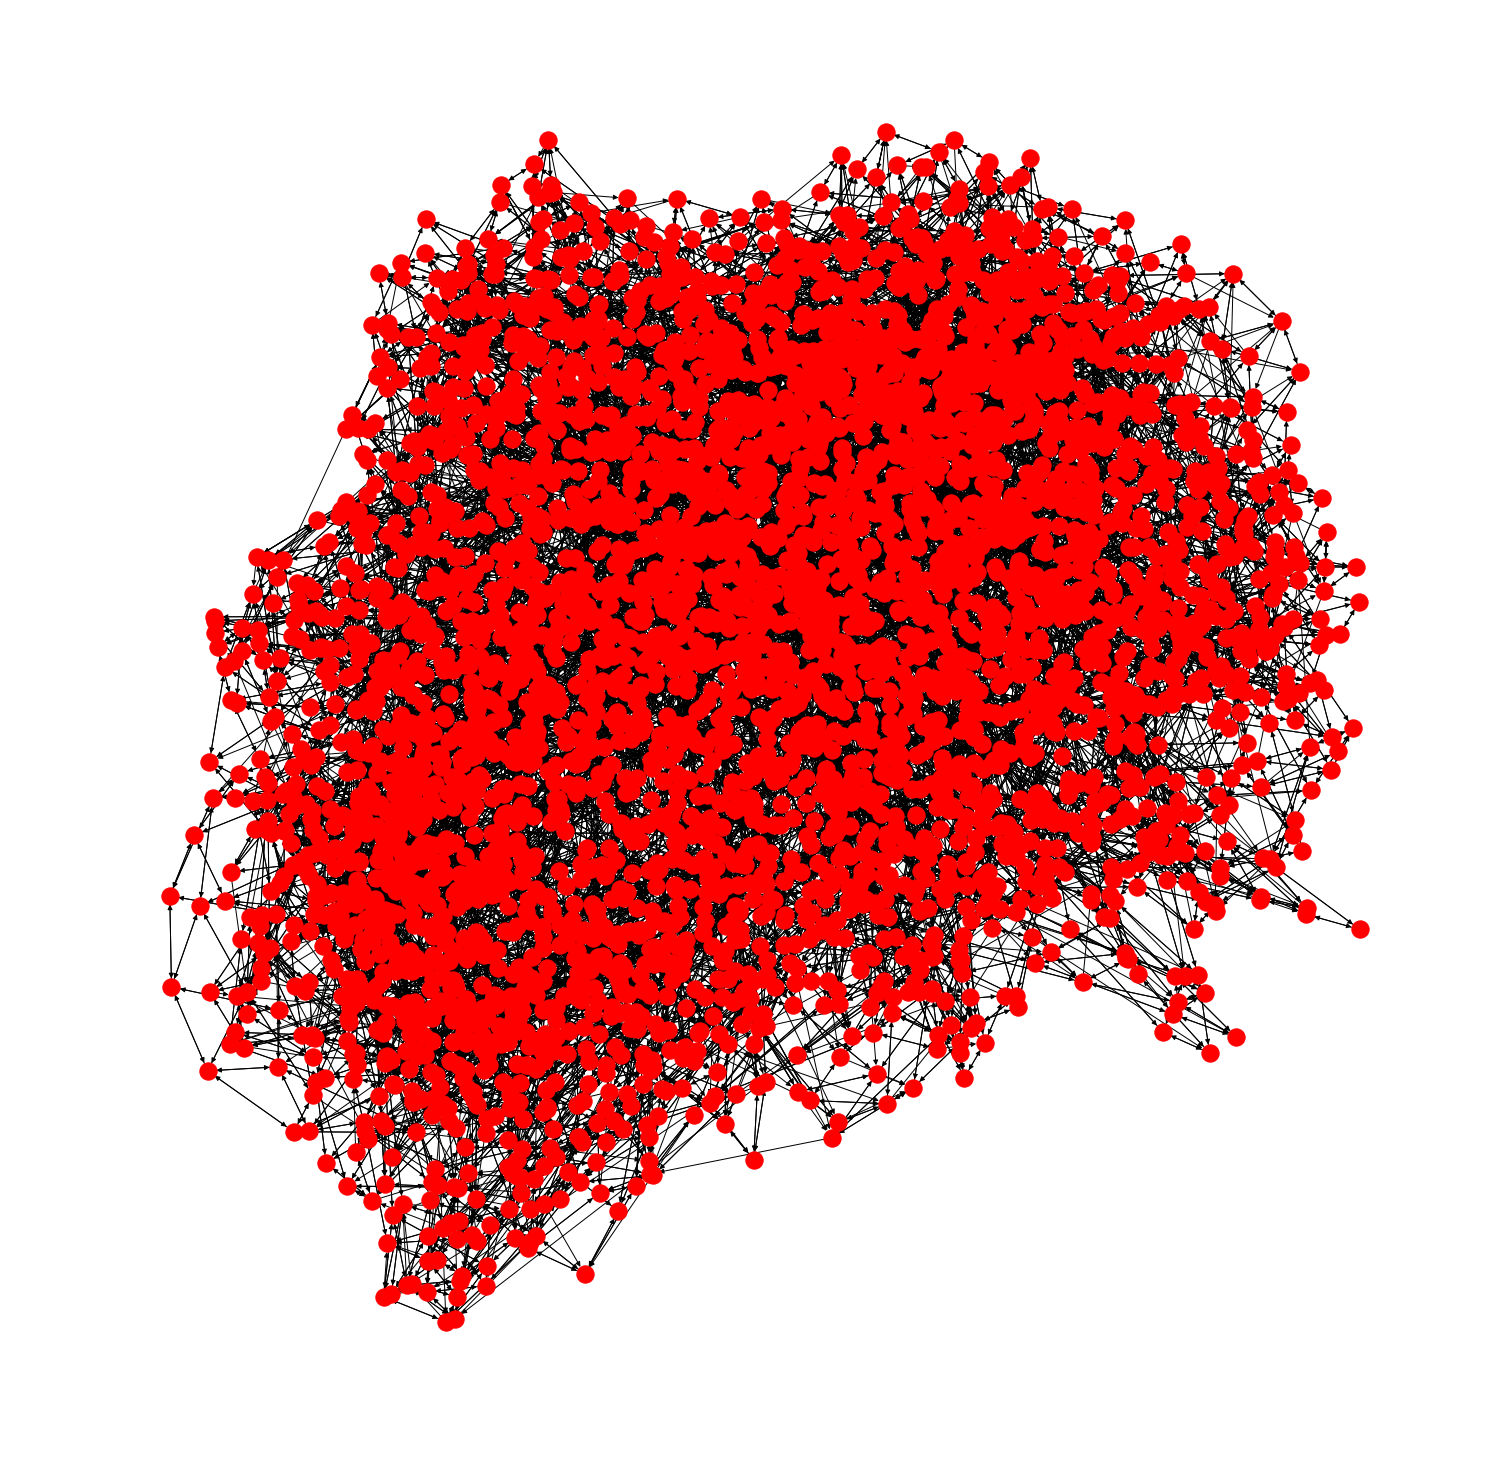

In [39]:
plt.figure(figsize=(20,20))
nx.draw(smn)

#### 2.2 small world index: because of the fact that we know, because we created, the small world graph, we can apply Omega in order to know the graph index

In [44]:
und_smn = smn.to_undirected()

In [45]:
type(und_smn)

networkx.classes.graph.Graph

In [ ]:
sw = nx.smallworld.omega(und_smn)

In order to generate the small world index, the formula is 
$$ sigma= \frac{gamma}{lambda} $$ , 
where 
$$ \text{gamma=} \frac{\text{clustering_coefficient(g)}}{\text{clustering coefficient(random network with the same number of nodes as g)}}\\ \\
\text{ and }\\ \\ \text{ lambda=} \frac{\text{mean shortest path length in g}}{\text{mean shortest path length in a random network with the same number of nodes as g}} $$ sigma denotes the smallworldness value. 
We first needed to set the two graphs:
1) g, that is a watts strogats graph, a random graph, that shows small-world properties:
- short average path lengths
- high clustering
- Very peaked degree distribution (Dirac delta)
and



2) random graph as explained above. 

In [91]:
def sigma(n,k, p):
    g = nx.erdos_renyi_graph(n, p)
    
    c_g = nx.average_clustering(g)
    sp_g = nx.average_shortest_path_length(g)

    rand = nx.random_regular_graph(k, n)

    c_rand = nx.average_clustering(rand)
    sp_rand = nx.average_shortest_path_length(rand)

    sigma = ( c_g / sp_g ) / (c_rand / sp_rand)
    index = sigma
    return sigma

In [94]:
n = 64
P = [0.15,0.5, 1.00]
K = [2, 3, 4, 5, 6]
sigmas = ()

for i in range(len(P)):
    print(P[i])
    for j in range(len(K)):
        
        lst = []
        lst.append(sigma(n, K[j], P[i]))
        
    sigmas.append(tuple(lst))
sigmas = tuple(sigmas)

0.15


NetworkXError: Graph is not connected.

In [65]:
nodes = g.nodes()
sum([len(nx.edges(g, e)) for e in nodes])/len(nodes)    

10.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))
 
data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

In [96]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


4 Community detection: we perform this task with the graph 'sub', that is the graph with 19 nodes.
We used the algorithm of Newman in order to show the composition of communities. 
There is a method in networkx that helped us to make it, called girvan_newman . 

In [70]:
import networkx as nx
from networkx.algorithms import community

communities_generator = community.girvan_newman(sub) 

top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
next_level_communities = sorted(map(sorted, next_level_communities))

print('number of communities:')
print(len(next_level_communities))
print('composition of communities:')
next_level_communities

number of communities:
4
composition of communities:


[['C3',
  'Cz',
  'F3',
  'F4',
  'F7',
  'F8',
  'Fp1',
  'Fp2',
  'Fz',
  'O1',
  'P3',
  'P4',
  'P7',
  'Pz',
  'T7'],
 ['C4', 'O2'],
 ['P8'],
 ['T8']]

In [39]:
netwx_graphs = []
for e in next_level_communities:
    comm = sub.subgraph(e)
    netwx_graphs.append(comm)
    pos = nx.circular_layout(comm)
    plt.figure(figsize=(12,12))
    nx.draw(comm, with_labels = True, pos=pos, font_size=15, node_size=[1000]*64)

NameError: name 'next_level_communities' is not defined

In [38]:
composed = nx.compose_all(netwx_graphs)

pos = nx.circular_layout(composed)
plt.figure(figsize=(12,12))
nx.draw(composed, with_labels = True,pos=pos, font_size=15, node_size=[1000]*64)

NameError: name 'netwx_graphs' is not defined

4.3 this point asks to create the community structure with infomap, and to compare with the modularity based one
(the modularity based is the one with Newman)

In [72]:
import matplotlib.colors as colors

In [76]:
import matplotlib.colors as colors
from infomap import infomap

ModuleNotFoundError: No module named 'infomap'

In [73]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
    infomapWrapper = infomap.Infomap("--two-level --silent")

    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        infomapWrapper.addLink(*e)

    print("Find communities with Infomap...")
    infomapWrapper.run();

    tree = infomapWrapper.tree

    print("Found %d modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

    communities = {}
    for node in tree.leafIter():
        communities[node.originalLeafIndex] = node.moduleIndex()

    nx.set_node_attributes(G, name='community', values=communities)
    return tree.numTopModules()

In [74]:
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # Set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Draw node labels
    for n in G.nodes():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 0],
            color = cmapDark(communities[n])
        )

    plt.axis('off')
    # plt.savefig("karate.png")
    plt.show()

In [75]:
findCommunities(sub)
drawNetwork(sub)

NameError: name 'infomap' is not defined